Pratice 1 : Tensor Operations & Autograd Engineering
### 1. Tensor

In [2]:
import torch as torch

/home/connectome/ahhyun724/.conda/envs/3D_CNN_woPip/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
t1 = torch.zeros(2,3)
print(t1)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [3]:
t2 = torch.arange(4)
print(t2)
print(t2.shape)
print(t2.dtype)
print(t2.device)

tensor([0, 1, 2, 3])
torch.Size([4])
torch.int64
cpu


In [4]:
t3 = torch.rand(2,3)
print(t3)
print(t3.shape)
print(t3.dtype)
print(t3.device)

tensor([[0.0911, 0.4637, 0.7852],
        [0.3294, 0.6929, 0.8184]])
torch.Size([2, 3])
torch.float32
cpu


In [5]:
print(t1.device)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
t1_gpu = t1.to(device)
print(t1_gpu.device)

cpu
cuda:0


In [7]:
t1 = torch.arange(6)
print(t1.shape)
print(t1)
t1_reshaped = t1.reshape(2,3)
print(t1_reshaped)
print(t1_reshaped.shape)

torch.Size([6])
tensor([0, 1, 2, 3, 4, 5])
tensor([[0, 1, 2],
        [3, 4, 5]])
torch.Size([2, 3])


In [11]:
t1 = torch.arange(6).reshape(2,3)
print(t1)
t1_unsqueeze = t1.unsqueeze(dim=1)
print(f'<Using unsqueeze>\n{t1_unsqueeze.shape} \n{t1_unsqueeze}')
t1_reshaped = t1.reshape(2,1,3)
print(f'<Using unsqueeze>\n{t1_reshaped.shape} \n{t1_reshaped}')

tensor([[0, 1, 2],
        [3, 4, 5]])
<Using unsqueeze>
torch.Size([2, 1, 3]) 
tensor([[[0, 1, 2]],

        [[3, 4, 5]]])
<Using unsqueeze>
torch.Size([2, 1, 3]) 
tensor([[[0, 1, 2]],

        [[3, 4, 5]]])


In [12]:
t1_reshape = t1.reshape(3,2) 
t1_permute = t1.permute(1,0) #dimension swap 2번째 -> 1번째, 1번째 -> 0번째
print(t1_reshape)
print(t1_permute)

tensor([[0, 1],
        [2, 3],
        [4, 5]])
tensor([[0, 3],
        [1, 4],
        [2, 5]])


In [15]:
t1=torch.arange(6).reshape(2,3)
t2=torch.arange(12).reshape(3,4)
print(t1)
print(t1.shape)
print(t2)
print(t2.shape)

tensor([[0, 1, 2],
        [3, 4, 5]])
torch.Size([2, 3])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
torch.Size([3, 4])


In [18]:
t3 = t1@t2
print(t3)
print(torch.matmul(t1,t2))

tensor([[20, 23, 26, 29],
        [56, 68, 80, 92]])
tensor([[20, 23, 26, 29],
        [56, 68, 80, 92]])


In [23]:
t1= torch.tensor([[3,6,4],[2,4,7]])
print(t1)

tensor([[3, 6, 4],
        [2, 4, 7]])


In [26]:
row_argmax = torch.argmax(t1, dim=1)
row_argmax_keepdim = torch.argmax(t1, dim=1, keepdim=True)
row_sum = torch.sum(t1, dim=-1)
print(row_argmax)
print(row_argmax_keepdim)
print(row_sum)

tensor([1, 2])
tensor([[1],
        [2]])
tensor([13, 13])


In [27]:
col_argmax = torch.argmax(t1, dim=0)
col_argmax_keepdim = torch.argmax(t1, dim =0, keepdim=True)
col_sum = torch.sum(t1, dim=0)
print(col_argmax)
print(col_argmax_keepdim)
print(col_sum)

tensor([0, 0, 1])
tensor([[0, 0, 1]])
tensor([ 5, 10, 11])


In [3]:
# stack & cat
x1 = torch.tensor([1,2,3])
x2 = torch.tensor([4,5,6])
print(x1.shape, x2.shape)
batch = torch.stack([x1,x2], dim=0)
stacked = torch.stack([x1,x2], dim=1)
print(f'<batch>\n{batch.shape}\n{batch}')
print(f'<stacked>\n{stacked.shape}\n{stacked}')

torch.Size([3]) torch.Size([3])
<batch>
torch.Size([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])
<stacked>
torch.Size([3, 2])
tensor([[1, 4],
        [2, 5],
        [3, 6]])


In [4]:
print(x1.shape, x2.shape)
concat = torch.cat([x1,x2], dim=0)
print(f'<concat>\n{concat.shape}\n{concat}')

torch.Size([3]) torch.Size([3])
<concat>
torch.Size([6])
tensor([1, 2, 3, 4, 5, 6])


In [5]:
# Autograd Engine
# cf) Autograd Engine 은 연산 그래프 내 주어진 모든 tensor 의 gradient 값을 계산한다 (X)
# cf) Autograd Engine 은 backpropagation 에 필요한 parameters 의 gradient 값을 자동으로 계산한다.(O)

x = torch.tensor(-2.0, requires_grad=True)
y = torch.tensor(5.0, requires_grad=True)
z = torch.tensor(-4.0, requires_grad=True)
print(x.grad)
f = (x+y)*z
print(x.grad)

f.backward() #gradient 계산

print(x.grad)
print(y.grad)
print(z.grad)

None
None
tensor(-4.)
tensor(-4.)
tensor(3.)


### Practice2 : Implementation of Simple Model Training


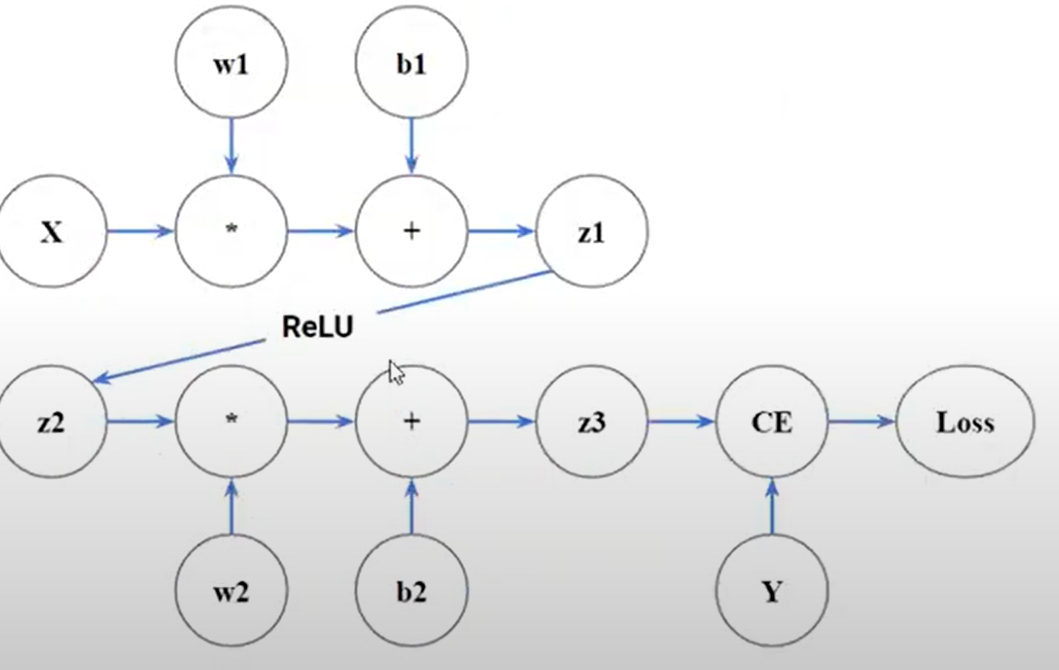

In [8]:
import torch.nn.functional as F
"""
You can use F.relu() for ReLU layer. ex) y = F.relu(x)
"""
# X, Y, b1, b2 are vectors w1 & w2 are matrices
# size of z1 is 5


x = torch.ones(7)
y = torch.zeros(3)

#GEnerate w1,b1,w2,b2
w1 = torch.randn(7, 5, requires_grad = True)  #(7) @ (7,5) = (5)
b1 = torch.randn(5, requires_grad = True)  #(5)
w2 = torch.randn(5, 3, requires_grad = True) #(5) @ (5,3) = (3)

# compute z1
z1 = x @ w1 + b1 #(5)
# compute z2
z2 = F.relu(z1) #(5)
# comupte z3
z3 = z2 @ w2 #(3)``


# Calculate loss
loss = F.binary_cross_entropy_with_logits(z3, y)


# backpropagation
loss.backward()

print(w1.grad)
print(b1.grad)
print(w2.grad)
print(z1.grad)
   

tensor([[-0.1798, -0.0683,  0.0325, -0.1765,  0.1266],
        [-0.1798, -0.0683,  0.0325, -0.1765,  0.1266],
        [-0.1798, -0.0683,  0.0325, -0.1765,  0.1266],
        [-0.1798, -0.0683,  0.0325, -0.1765,  0.1266],
        [-0.1798, -0.0683,  0.0325, -0.1765,  0.1266],
        [-0.1798, -0.0683,  0.0325, -0.1765,  0.1266],
        [-0.1798, -0.0683,  0.0325, -0.1765,  0.1266]])
tensor([-0.1798, -0.0683,  0.0325, -0.1765,  0.1266])
tensor([[0.0079, 0.0049, 0.0354],
        [0.0751, 0.0465, 0.3371],
        [0.1453, 0.0900, 0.6524],
        [0.0593, 0.0367, 0.2663],
        [0.0550, 0.0341, 0.2470]])
None


/home/connectome/ahhyun724/.conda/envs/3D_CNN_woPip/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)


### 2. Dataset & DataLoader

In [4]:
import torch
import torch.nn.functional as F
# Datast and DataLoader
torch.utils.data.Dataset
## python class, called by Dataloader implicitly. must implement init, len, get item



torch.utils.data.DataLoader
# Dataset 을 model 로 전달
# batch_size, shuffle, num_workers, pin_memory 등을 설정할 수 있다.



torch.utils.data.dataloader.DataLoader

In [5]:
from torch.utils.data import Dataset, DataLoader
import csv
import numpy as np
import random

class SimpleDataset(Dataset):
    def __init__(self, csv_file = None, root_dir= None):
        # with open(csv_file) as file:
        #     self.annotations = file.readlines()
        # self.root_dir = root_dir

        # set x_data with random length
        n_dataset = 100
        self.x_data = []
        for _ in range(n_dataset):
            random_length = random.randint(5,10)
            self.x_data.append(np.random.randint(0,255,random_length))
        # set y_data
        self.y_data = torch.rand(n_dataset, 1)

        print("SimpleDataset setting done")
        print(f'x_data shape: {len(self.x_data)}')
        print(f'x_data random length (1st, 4th, 46th): {len(self.x_data[0]),len(self.x_data[3]), len(self.x_data[45])}')
        print(f'y_data shape: {self.y_data.shape}')


    def __getitem__(self, idx):
        # x_path, y = self.annotations[idx]
        # x = self.read(x_path)
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x, y
    
    def __len__(self):
        return len(self.x_data)
    

    # def read(self,x_path):
    #     return x_path


    # collate_fn
    # Dataloader 의 batch 단위로 input을 처리하ㅣㄱ 위한 작업 ex) 서로 다른 길이의 input 에 zero-padding 을 추가해 길이 맞추기
    def collate_fn(self, data):
        max_len = 10
        batch = []
        for x,y in data:
            x_padded = torch.cat([x, torch.zeros(max_len-x.shape[0])])
            batch.append(x_padded)
        return torch.stack(batch, dim=0)


dataset = SimpleDataset()
#dataloader = DataLoader(dataset, batch_size = 16, shuffle = True)

SimpleDataset setting done
x_data shape: 100
x_data random length (1st, 4th, 46th): (5, 8, 9)
y_data shape: torch.Size([100, 1])


In [7]:
dataloader = DataLoader(dataset, batch_size=25, collate_fn = dataset.collate_fn, shuffle=True)
for batch_idx, samples in enumerate(dataloader):
    print("batch idx: ", batch_idx + 1)
    print("sample shape: ", samples.shape)

    if batch_idx==len(dataloader)-1:
        print(len(dataloader))
        print(batch_idx)
        print(samples)


batch idx:  1
sample shape:  torch.Size([25, 10])
batch idx:  2
sample shape:  torch.Size([25, 10])
batch idx:  3
sample shape:  torch.Size([25, 10])
batch idx:  4
sample shape:  torch.Size([25, 10])
4
3
tensor([[134.,  45., 201., 121., 234., 156.,  64.,  54.,   7.,   0.],
        [143., 225., 165., 136.,  64., 198.,  37.,  98.,   0.,   0.],
        [ 88., 216., 203., 165., 238.,   2., 171.,  19.,  71., 181.],
        [180., 153., 180.,  18.,  23.,  75.,   7.,   0.,   0.,   0.],
        [111.,  53.,  64.,  44., 123.,   0.,   0.,   0.,   0.,   0.],
        [  5., 239.,  40.,  89., 250., 169., 153., 208.,  53.,   0.],
        [ 17., 217., 163., 213.,  21., 103., 176., 242.,   0.,   0.],
        [ 97.,  78.,   5.,  14.,  10.,   0.,   0.,   0.,   0.,   0.],
        [238., 151., 132., 207., 141., 151., 100., 132., 223.,   0.],
        [220., 148.,  58.,  85.,  19., 233.,  65.,  66.,   0.,   0.],
        [246.,  53.,  12., 146., 134.,   0.,   0.,   0.,   0.,   0.],
        [ 99.,  99.,  96.,

### 3. Implementing a Model
3-1. Preparing dataset(MNIST)

In [24]:
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# set dataset
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor()
)

# set datalaoder
BATCH_SIZE = 64
train_loader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle = True)
test_loader = DataLoader(test_data, batch_size = BATCH_SIZE, shuffle = False)


In [10]:
import torch.nn as nn

class simple_model(nn.Module):
    def __init__(self):
    ### Declare parameters(layers, etc.)
        super(simple_model, self).__init__()
        self.fc_layer = nn.Linear(16,64)
        self.relu = nn.functional.relu
    def forward(self, x):
    ### Build model with declared parameters, Calling model implicitly calls forward function
        x = self.fc_layer(x)
        x = self.relu(x)
        return x
model = simple_model()
print(model)

simple_model(
  (fc_layer): Linear(in_features=16, out_features=64, bias=True)
)


In [19]:
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(32 * 14 * 14, 128),  # Adjust the input size according to your input dimensions
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)  # Assuming 10 classes for classification
        )
    
    def forward(self, x):
        x = self.conv_layer(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc_layer(x)
        return x


In [21]:
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Training a Model
def train(model, scheduler, optim, loss_fn, train_loader, epochs, batch_size):
    for epoch in range(epochs):
        train_loss = 0.0
        model.train() # training mode
        for batch in train_loader:
            optim.zero_grad() # set grad to zero for each batch (batch 단위로 gradient를 0으로 초기화)

            input, target = batch
            # copy input & target to device where model exists
            input = input.to(device)
            target = target.to(device)

            output = model(input) # Forward pass

            loss = loss_fn(output, target) # Loss function

            loss.backward() # Backpropagation

            optim.step() # Update parameters using optimizer

            train_loss += loss.detach().item()
        scheduler.step() # Update learning rate
        train_loss /= len(train_loader) # Average over the number of batches, not dataset size
        print(f'Epoch: {epoch+1}, Training Loss: {train_loss}')

# Assuming model and train_loader are already defined
model = SimpleModel().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
num_epochs = 10 # SET number of epochs
BATCH_SIZE = 64 # SET batch size
train(model, scheduler, optimizer, nn.CrossEntropyLoss(), train_loader, num_epochs, BATCH_SIZE)


Epoch: 1, Training Loss: 0.42241035255669024
Epoch: 2, Training Loss: 0.12479308089102382
Epoch: 3, Training Loss: 0.08461533792700165
Epoch: 4, Training Loss: 0.0588705914066747
Epoch: 5, Training Loss: 0.04596053717793452
Epoch: 6, Training Loss: 0.03700138933508337
Epoch: 7, Training Loss: 0.030036928834143415
Epoch: 8, Training Loss: 0.02368262399999258
Epoch: 9, Training Loss: 0.01982229205346959
Epoch: 10, Training Loss: 0.016502483194988808


In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the SimpleModel class
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(32 * 14 * 14, 128),  # Adjust the input size according to your input dimensions
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)  # Assuming 10 classes for classification
        )
    
    def forward(self, x):
        x = self.conv_layer(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc_layer(x)
        return x

# Training a Model
def train(model, scheduler, optim, loss_fn, train_loader, epochs, batch_size):
    for epoch in range(epochs):
        train_loss = 0.0
        model.train() # training mode
        for batch in train_loader:
            optim.zero_grad() # set grad to zero for each batch (batch 단위로 gradient를 0으로 초기화)

            input, target = batch
            # copy input & target to device where model exists
            input = input.to(device)
            target = target.to(device)

            output = model(input) # Forward pass

            loss = loss_fn(output, target) # Loss function

            loss.backward() # Backpropagation

            optim.step() # Update parameters using optimizer

            train_loss += loss.detach().item()
        scheduler.step() # Update learning rate
        train_loss /= len(train_loader) # Average over the number of batches, not dataset size
        print(f'Epoch: {epoch+1}, Training Loss: {train_loss}')

# Testing the Model
def test(model, loss_fn, test_loader):
    model.eval()  # evaluation mode
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():  # no need to track gradients
        for batch in test_loader:
            input, target = batch
            input = input.to(device)
            target = target.to(device)

            output = model(input)
            loss = loss_fn(output, target)

            test_loss += loss.detach().item()
            _, predicted = torch.max(output, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    test_loss /= len(test_loader)
    accuracy = 100 * correct / total
    print(f'Test Loss: {test_loss}, Accuracy: {accuracy}%')




model = SimpleModel().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
loss_fn = nn.CrossEntropyLoss()

num_epochs = 10 # SET number of epochs
BATCH_SIZE = 64 # SET batch size

train(model, scheduler, optimizer, loss_fn, train_loader, num_epochs, BATCH_SIZE)
test(model, loss_fn, test_loader)


Epoch: 1, Training Loss: 0.4118282949802146
Epoch: 2, Training Loss: 0.10925794622676173
Epoch: 3, Training Loss: 0.06686696110527589
Epoch: 4, Training Loss: 0.04845443941893052
Epoch: 5, Training Loss: 0.03764953223471123
Epoch: 6, Training Loss: 0.030902610966692
Epoch: 7, Training Loss: 0.02442873837703691
Epoch: 8, Training Loss: 0.020019005574194143
Epoch: 9, Training Loss: 0.015993624933649534
Epoch: 10, Training Loss: 0.013196969507672915
Test Loss: 0.03887475937185077, Accuracy: 98.64%


In [ ]:
import torch
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def test(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    misclassified_images = []
    misclassified_labels = []
    misclassified_preds = []

    with torch.no_grad():  # No need to calculate gradients during testing
        for batch in test_loader:
            inputs, targets = batch  # Unpack batch data
            inputs = inputs.to(device)
            targets = targets.to(device)

            outputs = model(inputs)  # Forward pass
            _, preds = torch.max(outputs, 1)  # Get the index of the max log-probability

            # Find misclassified images
            misclassified_mask = preds != targets
            misclassified_images.extend(inputs[misclassified_mask].cpu())
            misclassified_labels.extend(targets[misclassified_mask].cpu())
            misclassified_preds.extend(preds[misclassified_mask].cpu())

    return misclassified_images, misclassified_labels, misclassified_preds

# Example usage
misclassified_images, misclassified_labels, misclassified_preds = test(model, test_loader)

# Now you can access misclassified_images, misclassified_labels, and misclassified_preds
# For example, to print the first misclassified image and its labels:
import matplotlib.pyplot as plt

if misclassified_images:
    img = misclassified_images[0].permute(1, 2, 0)  # Change the order of dimensions for plotting
    plt.imshow(img)
    plt.title(f'True label: {misclassified_labels[0]}, Predicted: {misclassified_preds[0]}')
    plt.show()
else:
    print("No misclassified images found.")

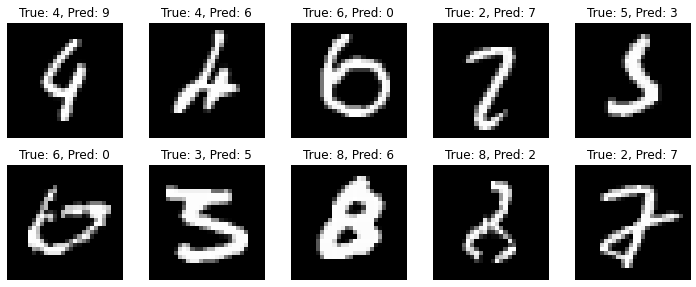

In [27]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def test(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    misclassified_images = []
    misclassified_labels = []
    misclassified_preds = []

    with torch.no_grad():  # No need to calculate gradients during testing
        for batch in test_loader:
            inputs, targets = batch  # Unpack batch data
            inputs = inputs.to(device)
            targets = targets.to(device)

            outputs = model(inputs)  # Forward pass
            _, preds = torch.max(outputs, 1)  # Get the index of the max log-probability

            # Find misclassified images
            misclassified_mask = preds != targets
            misclassified_images.extend(inputs[misclassified_mask].cpu())
            misclassified_labels.extend(targets[misclassified_mask].cpu())
            misclassified_preds.extend(preds[misclassified_mask].cpu())

    return misclassified_images, misclassified_labels, misclassified_preds

# Example usage
misclassified_images, misclassified_labels, misclassified_preds = test(model, test_loader)

# Visualize the misclassified images
def plot_misclassified_images(images, true_labels, predicted_labels, num_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(min(num_images, len(images))):
        plt.subplot(5, 5, i + 1)
        img = images[i].squeeze()  # Remove channel dimension for grayscale images
        plt.imshow(img, cmap='gray')
        plt.title(f'True: {true_labels[i]}, Pred: {predicted_labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot the first 10 misclassified images
plot_misclassified_images(misclassified_images, misclassified_labels, misclassified_preds, num_images=10)